# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [4]:

city_name = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record_one = 1

# Print Starting Log Statement
print('Beginning Data Retrieval')
print('-------------------------------')

for city in cities:

    try:
        response = requests.get(query_url + city).json()
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {record_one} | {city_record}")
       
        record_one += 1
        
    except:
        print("City not found. Skipping...") 
    continue
print('Data Retrieval Complete')
print('-------------------------------')

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Poum
Processing Record 2 | Port Elizabeth
Processing Record 3 | Lebu
Processing Record 4 | Petropavlovsk-Kamchatskiy
Processing Record 5 | Butaritari
Processing Record 6 | Buala
City not found. Skipping...
Processing Record 7 | Bambous Virieux
Processing Record 8 | Esperance
Processing Record 9 | Malakal
Processing Record 10 | Arlit
City not found. Skipping...
Processing Record 11 | Rikitea
Processing Record 12 | Vaini
Processing Record 13 | Pandan
Processing Record 14 | Cap Malheureux
Processing Record 15 | Albany
Processing Record 16 | Barrow
Processing Record 17 | Palmer
Processing Record 18 | Longyearbyen
Processing Record 19 | Yellowknife
Processing Record 20 | Port Blair
Processing Record 21 | Sorong
Processing Record 22 | Busselton
Processing Record 23 | Fairbanks
Processing Record 24 | Zhigansk
Processing Record 25 | Forsytheganj
Processing Record 26 | Dossor
Processing Record 27 | Marzuq
Processing 

Processing Record 231 | Sydney
Processing Record 232 | Paraná
City not found. Skipping...
Processing Record 233 | Avesta
Processing Record 234 | Krasnoborsk
Processing Record 235 | Līsakovsk
Processing Record 236 | Carutapera
Processing Record 237 | Dikson
Processing Record 238 | Daokou
Processing Record 239 | Ghātanji
Processing Record 240 | Finschhafen
Processing Record 241 | Northam
Processing Record 242 | Vila Franca do Campo
Processing Record 243 | Keminmaa
City not found. Skipping...
Processing Record 244 | Mount Isa
Processing Record 245 | Torbay
Processing Record 246 | Quatre Cocos
Processing Record 247 | Tuktoyaktuk
Processing Record 248 | Ubari
Processing Record 249 | Sakakah
Processing Record 250 | Jega
Processing Record 251 | Chervonohryhorivka
Processing Record 252 | Sault Ste. Marie
Processing Record 253 | Mendoza
Processing Record 254 | Yulin
City not found. Skipping...
Processing Record 255 | Sémbé
Processing Record 256 | Port Pirie
Processing Record 257 | Bo Phloi
Proc

Processing Record 459 | Noshiro
Processing Record 460 | Māngrol
Processing Record 461 | Outlook
Processing Record 462 | Wałcz
Processing Record 463 | Lebanon
City not found. Skipping...
Processing Record 464 | Ettaiyapuram
Processing Record 465 | Kayerkan
Processing Record 466 | Turbat
Processing Record 467 | Emerald
Processing Record 468 | Esso
Processing Record 469 | Champerico
City not found. Skipping...
Processing Record 470 | Klaksvík
Processing Record 471 | Charlestown
Processing Record 472 | Kidal
Processing Record 473 | Maués
Processing Record 474 | Magugu
Processing Record 475 | Ayotzintepec
Processing Record 476 | Myitkyina
Processing Record 477 | Gigmoto
Processing Record 478 | Port Hedland
Processing Record 479 | Xaçmaz
Processing Record 480 | Abu Kamal
Processing Record 481 | Portobelo
Processing Record 482 | Ancud
Processing Record 483 | Snåase
Processing Record 484 | County Wicklow
Processing Record 485 | Marawi
Processing Record 486 | Altay
Processing Record 487 | Pláta

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Date": date
}

weather_df = pd.DataFrame(weather_dict)
weather_df

,Humidity,Cloudiness,Wind Speed,Country,City,Latitude,Longitude,Max Temperature,Date
0,73,30,7.70,NC,Poum,-20.2333,164.0167,75.54,1635136626
1,94,0,6.91,ZA,Port Elizabeth,-33.9180,25.5701,53.89,1635136627
2,92,78,3.98,CL,Lebu,-37.6167,-73.6500,53.10,1635136627
3,39,20,11.18,RU,Petropavlovsk-Kamchatskiy,53.0452,158.6483,41.59,1635136627
4,71,4,2.08,KI,Butaritari,3.0707,172.7902,82.35,1635136627
...,...,...,...,...,...,...,...,...,...
558,59,100,8.72,KZ,Emba,48.8264,58.1442,49.21,1635136782
559,95,62,9.10,RU,Anadyr,64.7500,177.4833,-9.80,1635136782
560,86,90,6.91,US,Monroe,43.1501,-77.6831,51.49,1635136672
561,44,9,1.01,IN,Phek,25.6667,94.5000,72.16,1635136782


In [12]:

weather_df.to_csv("./weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

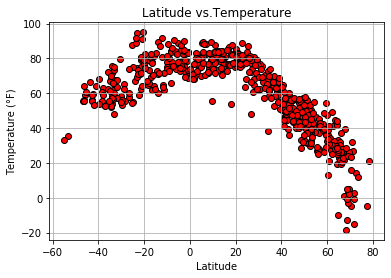

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], facecolors="red", marker="o", edgecolor="black")
plt.title("Latitude vs.Temperature")
plt.ylabel("Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

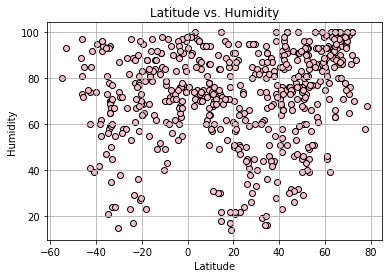

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], facecolors="pink", marker="o", edgecolor="black")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

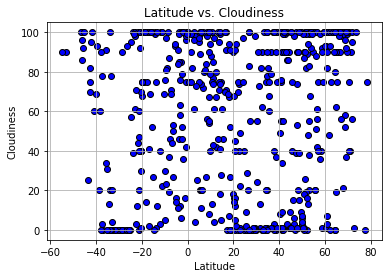

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

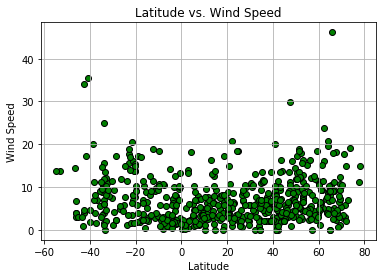

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolors="green", marker="o", edgecolor="black")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Wind.png")
plt.show()

## Linear Regression

In [14]:
northern_df = weather_df.loc[(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

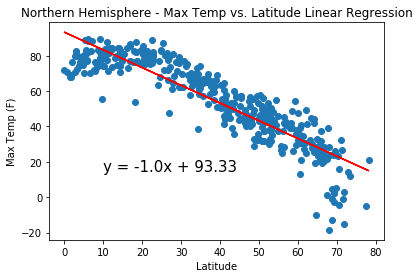

In [15]:
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="black")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig("North_vs_Max_Temperature.png")
plt.show()

in the norhtern hemisphere, this plot shows us that there is a negative correlation 
between the temperature and the latitude.As the temperature goes down the latitude 
goes down as well


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

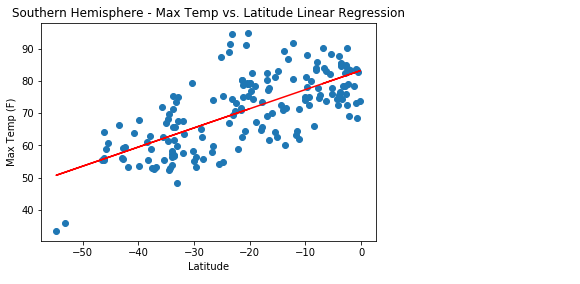

In [16]:
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,20),fontsize=15,color="black")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig("South_vs_Max_Temperature.png")
plt.show()

in the southern hemisphere, this plot shows us that there is a positive correlation 
between the temperature and the latitude.As the temperature goes up the latitude 
goes up as well

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

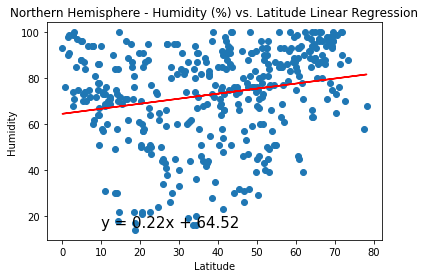

In [17]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="black")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(".North_vs_Humidity.png")
plt.show()

In the norhtern hemisphere, this plot shows us that there is no correlation  
between humidity and latitude.There is no positive or negative correlation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

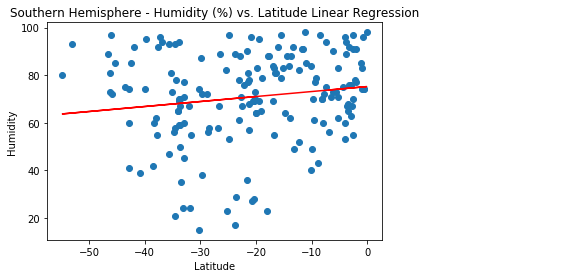

In [18]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("South_vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

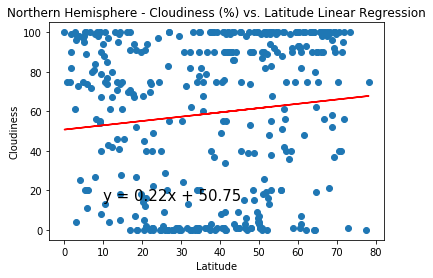

In [19]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="black")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("North_vs_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

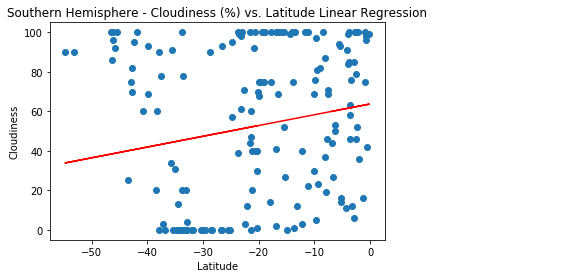

In [20]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="black")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("South_vs_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

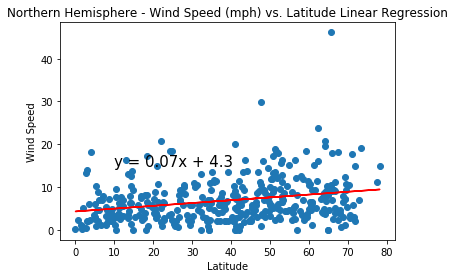

In [21]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="black")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("North_vs_Wind_Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

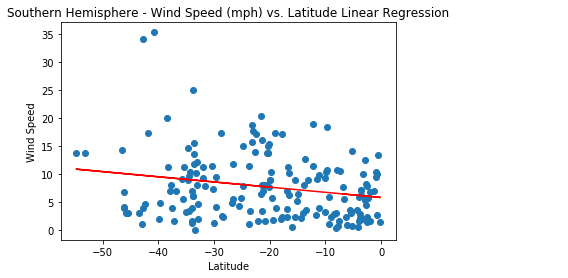

In [22]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="black")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("South_vs_Wind_Speed.png")
plt.show()